<a href="https://colab.research.google.com/github/lavou/ResearchMate/blob/main/6_0_Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Combine node and word embeddigs to generate a similarity matrix for authors.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
dir_path = '/content/drive/MyDrive/Pubmed_project/Dataframes'

In [ ]:
df = pd.read_pickle('/content/drive/My Drive/Pubmed_project/Dataframes/final_embeddings.pkl')

In [ ]:
df.head()

,Final_embeddings
Al-Shayeb B,"[0.07625947706009535, 0.06236998095975932, 0.1..."
Barendregt A,"[0.019399421845954196, -0.20864226456907436, 0..."
Batey RT,"[0.03972427045820143, 0.022166844808073113, 0...."
Bhuiya A,"[0.028337829182048503, -0.02928867910470235, 0..."
Cate JH,"[0.013357756863408723, 0.05910553574800407, 0...."


In [ ]:
# Authors names is the index, don't forget

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(np.vstack(df['Final_embeddings']))

# Convert the similarity matrix to a DataFrame with author names as index and columns
similarity_df = pd.DataFrame(similarity_matrix, index=df.index, columns=df.index)

# Display the similarity matrix
print(similarity_df)

                  Al-Shayeb B  Barendregt A  Batey RT  Bhuiya A   Cate JH  \
Al-Shayeb B          1.000000      0.221060  0.362840  0.331701  0.337607   
Barendregt A         0.221060      1.000000  0.450579  0.229788  0.446754   
Batey RT             0.362840      0.450579  1.000000  0.158361  0.545131   
Bhuiya A             0.331701      0.229788  0.158361  1.000000  0.257348   
Cate JH              0.337607      0.446754  0.545131  0.257348  1.000000   
Cofsky JC            0.471637      0.212226  0.401629  0.350187  0.370138   
Coyle SM             0.284941      0.429901  0.462564  0.242356  0.394594   
Doherty EA           0.372406      0.386952  0.880980  0.157341  0.489814   
Doudna JA            0.403343      0.444912  0.703765  0.223310  0.608139   
East-Seletsky A      0.390847      0.340389  0.486945  0.396583  0.411247   
Ehrenberg AJ         0.390626      0.229123  0.308361  0.324056  0.280523   
Escajeda AM          0.385502      0.296610  0.253563  0.675057  0.405779   

In [ ]:
similarity_df.to_pickle('/content/drive/My Drive/Pubmed_project/Dataframes/similarity_matrix.pkl')

In [ ]:
similarity_df.to_csv('/content/drive/My Drive/Pubmed_project/Dataframes/similarity_matrix.csv')

In [ ]:
similarity_df.to_json('/content/drive/My Drive/Pubmed_project/Dataframes/similarity_matrix.json')

####Some other tasks

1. Similarity clusters

In [ ]:
from sklearn.cluster import KMeans

# Choose the number of clusters
n_clusters = 5  # You can adjust the number of clusters based on your preference

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(df['Final_embeddings'].tolist())

# Assign cluster labels to the DataFrame
df['Cluster'] = labels

# Print the resulting clusters
print(df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                   Final_embeddings  Cluster
Al-Shayeb B       [0.07625947706009535, 0.06236998095975932, 0.1...        1
Barendregt A      [0.019399421845954196, -0.20864226456907436, 0...        4
Batey RT          [0.03972427045820143, 0.022166844808073113, 0....        4
Bhuiya A          [0.028337829182048503, -0.02928867910470235, 0...        2
Cate JH           [0.013357756863408723, 0.05910553574800407, 0....        4
Cofsky JC         [-0.14673971069565722, 0.22362708217189836, 0....        0
Coyle SM          [0.0835795902688048, -0.1024797099929246, 0.14...        4
Doherty EA        [-0.0015081016004547358, -0.06722167684076431,...        4
Doudna JA         [-0.018541181631078534, 0.06853366579174716, 0...        4
East-Seletsky A   [-0.12382305686249184, 0.1284753283914393, 0.0...        0
Ehrenberg AJ      [-0.04113388214790192, 0.11879528240883537, -0...        3
Escajeda AM       [-0.1144552257228471, 0.15000542123447327, 0.0...        2

2. Visualize in lower dim

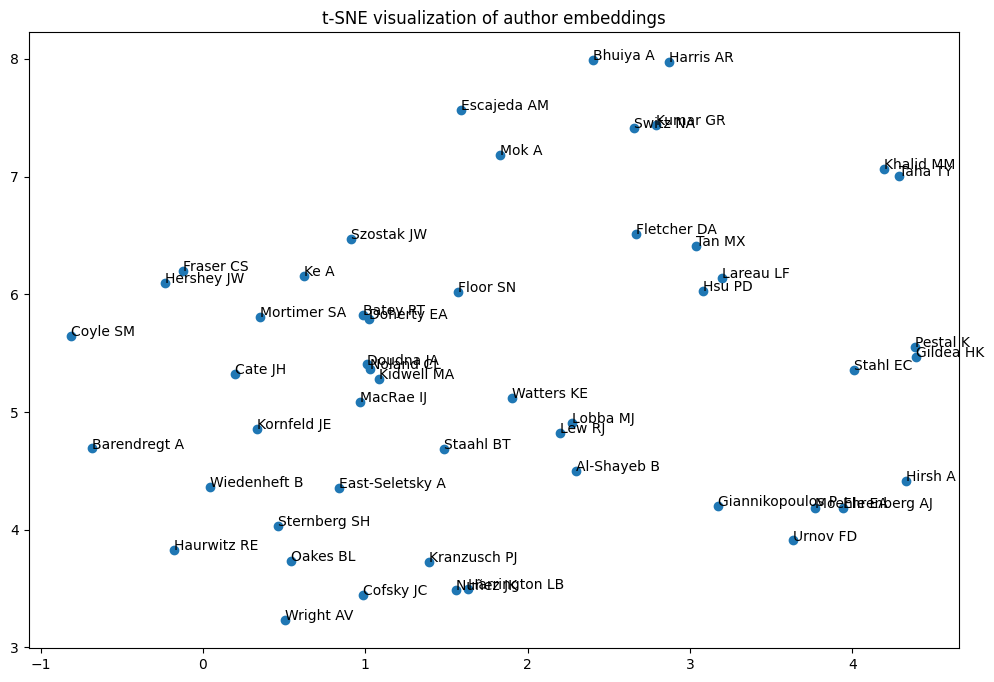

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert the list of embeddings to a NumPy array
embeddings_array = np.array(df['Final_embeddings'].tolist())

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
reduced_embeddings = tsne.fit_transform(embeddings_array)

# Plot the reduced embeddings
plt.figure(figsize=(12, 8))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

for i, author in enumerate(df.index):
    plt.annotate(author, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.title('t-SNE visualization of author embeddings')
plt.show()


3. Similar Authors recommendation


In [ ]:
def recommend_similar_authors(author, similarity_df, top_n=5):
    sorted_similarities = similarity_df.loc[author].sort_values(ascending=False)
    return sorted_similarities[1:top_n + 1]

author = "Barendregt A"
recommendations = recommend_similar_authors(author, similarity_df)
print(recommendations)

Kornfeld JE     0.638781
Wiedenheft B    0.582636
Haurwitz RE     0.506140
Batey RT        0.450579
Cate JH         0.446754
Name: Barendregt A, dtype: float64


4. Communities

In [ ]:
import networkx as nx
from community import community_louvain

# Create a graph from the similarity matrix
graph = nx.from_pandas_adjacency(similarity_df)

# Perform community detection using the Louvain algorithm
partition = community_louvain.best_partition(graph)

# Assign community labels to the DataFrame
df['Community'] = df.index.map(partition)

# Print the resulting communities
print(df)


                                                   Final_embeddings  Cluster  \
Al-Shayeb B       [0.07625947706009535, 0.06236998095975932, 0.1...        1   
Barendregt A      [0.019399421845954196, -0.20864226456907436, 0...        4   
Batey RT          [0.03972427045820143, 0.022166844808073113, 0....        4   
Bhuiya A          [0.028337829182048503, -0.02928867910470235, 0...        2   
Cate JH           [0.013357756863408723, 0.05910553574800407, 0....        4   
Cofsky JC         [-0.14673971069565722, 0.22362708217189836, 0....        0   
Coyle SM          [0.0835795902688048, -0.1024797099929246, 0.14...        4   
Doherty EA        [-0.0015081016004547358, -0.06722167684076431,...        4   
Doudna JA         [-0.018541181631078534, 0.06853366579174716, 0...        4   
East-Seletsky A   [-0.12382305686249184, 0.1284753283914393, 0.0...        0   
Ehrenberg AJ      [-0.04113388214790192, 0.11879528240883537, -0...        3   
Escajeda AM       [-0.1144552257228471, 

In [ ]:
#!pip install python-louvain networkx

In [ ]:
#!pip uninstall community
#!pip uninstall python-louvain
#!pip install python-louvain

In [ ]:
import networkx as nx
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Create a graph from the similarity_df
G = nx.from_pandas_adjacency(similarity_df)

# Apply the Louvain community detection algorithm
partition = community_louvain.best_partition(G)

AttributeError: ignored

In [ ]:
# Visualize the graph with nodes colored by community
pos = nx.spring_layout(G, seed=42)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)

nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

plt.title("Community detection in author networks")
plt.axis("off")
plt.show()

In [ ]:
# PLOTLY

import plotly.graph_objects as go
import plotly.express as px

# Create positions for the nodes using NetworkX's spring_layout
pos = nx.spring_layout(G, seed=42)

# Extract the x and y coordinates of the nodes
x_values = [pos[key][0] for key in pos.keys()]
y_values = [pos[key][1] for key in pos.keys()]

# Create a node trace for Plotly
node_trace = go.Scatter(
    x=x_values,
    y=y_values,
    mode="markers+text",
    text=list(pos.keys()),
    textposition="bottom center",
    textfont=dict(size=8, family="sans-serif"),
    marker=dict(
        size=15,
        color=list(partition.values()),
        colorscale="Viridis",
        line=dict(width=1),
        showscale=True,
        colorbar=dict(title="Community")
    ),
)

# Create an edge trace for Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5, color="#888"),
    hoverinfo="none",
    mode="lines",
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace["x"] += (x0, x1, None)
    edge_trace["y"] += (y0, y1, None)

# Create a layout for the Plotly graph
layout = go.Layout(
    title="Community detection in author networks",
    showlegend=False,
    hovermode="closest",
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

# Create the figure and display it
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()


In [ ]:
# save it as an HTML file (keep it interactive)

plots_folder = '/content/drive/MyDrive/Pubmed_project/PLOTS'
import plotly.io as pio
import os

html_file_path = os.path.join(plots_folder, '51_author_network_communities.html')
pio.write_html(fig, file=html_file_path, auto_open=False)

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# save it as PNG
import kaleido
fig.write_image("51_author_network_communities.png", scale=2)


FANCIER PLOT

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx

# Create positions for the nodes using NetworkX's spring_layout
pos = nx.spring_layout(G, seed=42, k=0.5)  # Increase k to reduce edge density

# Extract the x and y coordinates of the nodes
x_values = [pos[key][0] for key in pos.keys()]
y_values = [pos[key][1] for key in pos.keys()]

# Create a node trace for Plotly
node_trace = go.Scatter(
    x=x_values,
    y=y_values,
    mode="markers+text",
    text=list(pos.keys()),
    textposition="bottom center",
    textfont=dict(size=12, family="Arial", color="black"),
    marker=dict(
        size=20,
        color=list(partition.values()),
        colorscale="YlOrRd",
        line=dict(width=2),
        showscale=True,
        colorbar=dict(title="Community")
    ),
)

# Create an edge trace for Plotly
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=1, color="#888"),
    hoverinfo="none",
    mode="lines",
)

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace["x"] += (x0, x1, None)
    edge_trace["y"] += (y0, y1, None)

# Create a layout for the Plotly graph
layout = go.Layout(
    title=dict(text="Community detection in author networks", font=dict(size=24)),
    width=960,  # Adjust width to fit a PowerPoint slide
    height=540,  # Adjust height to fit a PowerPoint slide
    plot_bgcolor="rgba(240, 240, 240, 1)",
    paper_bgcolor="rgba(240, 240, 240, 1)",
    showlegend=False,
    hovermode="closest",
    margin=dict(b=20, l=5, r=5, t=40),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
)

# Create the figure and display it
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()


#### App playground


In [ ]:
import pandas as pd

def get_similarity_percentage(author1, author2, similarity_df):
    similarity = similarity_df.loc[author1, author2] * 100
    return round(similarity, 2)

def recommend_collaborators(author, similarity_df, num_recommendations=5):
    sorted_similarities = similarity_df[author].sort_values(ascending=False)
    top_recommendations = sorted_similarities.head(num_recommendations + 1).index.tolist()
    top_recommendations.remove(author)  # remove the input author from the recommendations
    return top_recommendations

In [ ]:
# create an interface
def main():
    while True:
        print("\nPlease choose an option:")
        print("1. Get similarity percentage between two authors.")
        print("2. Recommend best candidates for collaboration.")
        print("3. Exit.")
        choice = input("Enter the option number: ")

        if choice == '1':
            author1 = input("Enter the first author's name: ")
            author2 = input("Enter the second author's name: ")
            similarity = get_similarity_percentage(author1, author2, similarity_df)
            print(f"\nThe similarity percentage between {author1} and {author2} is {similarity}%.")

        elif choice == '2':
            author = input("Enter the author's name: ")
            recommendations = recommend_collaborators(author, similarity_df)
            print(f"\nTop {len(recommendations)} recommended collaborators for {author} are:")
            for idx, recommended_author in enumerate(recommendations, 1):
                print(f"{idx}. {recommended_author}")

        elif choice == '3':
            print("Goodbye!")
            break

        else:
            print("Invalid input. Please try again.")

if __name__ == "__main__":
    main()



Please choose an option:
1. Get similarity percentage between two authors.
2. Recommend best candidates for collaboration.
3. Exit.
Enter the option number: 2
Enter the author's name: Doudna JA

Top 5 recommended collaborators for Doudna JA are:
1. Noland CL
2. Doherty EA
3. Kidwell MA
4. Batey RT
5. Mortimer SA

Please choose an option:
1. Get similarity percentage between two authors.
2. Recommend best candidates for collaboration.
3. Exit.
Enter the option number: 1
Enter the first author's name: Doudna JA
Enter the second author's name: Cate JH

The similarity percentage between Doudna JA and Cate JH is 60.81%.

Please choose an option:
1. Get similarity percentage between two authors.
2. Recommend best candidates for collaboration.
3. Exit.
Enter the option number: 3
Goodbye!


In [ ]:
# PLAY AROUND with flask
!pip install Flask


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from flask import Flask, render_template_string, request

app = Flask(__name__)

@app.route('/')
def index():
    return render_template_string('''
<!DOCTYPE html>
<html>
<head>
<title>Author Collaboration Recommender</title>
</head>
<body>
  <h1>Author Collaboration Recommender</h1>
  <h2>Find Similarity Percentage</h2>
  <form action="/similarity" method="post">
    Author 1: <input type="text" name="author1" required><br>
    Author 2: <input type="text" name="author2" required><br>
    <input type="submit" value="Get Similarity Percentage">
  </form>
  <h2>Recommend Collaborators</h2>
  <form action="/recommend" method="post">
    Author: <input type="text" name="author" required><br>
    <input type="submit" value="Recommend Collaborators">
  </form>
</body>
</html>
''')

@app.route('/similarity', methods=['POST'])
def similarity():
    author1 = request.form['author1']
    author2 = request.form['author2']
    similarity = get_similarity_percentage(author1, author2, similarity_df)
    return f"The similarity percentage between {author1} and {author2} is {similarity}%."

@app.route('/recommend', methods=['POST'])
def recommend():
    author = request.form['author']
    recommendations = recommend_collaborators(author, similarity_df)
    recommendations_str = ', '.join(recommendations)
    return f"Top {len(recommendations)} recommended collaborators for {author} are: {recommendations_str}"

if __name__ == '__main__':
    app.run()
